# Projeto - DECISION TREE E RANDOM FOREST - Victor Tintel

<P> Vou por em prática como é o funcionamento do algoritmo Random Forest e Arvore de Decisão

In [3]:
# Importando os pacotes necessários

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [5]:
# Carregando nosso Dataset e visualizando as primeiras linhas

df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
# Quantidade de linhas e colunas do arquivo

df.shape

(20640, 10)

In [9]:
# Separando as variáveis preditoras e variavel target

preditoras = df.drop(['median_house_value','ocean_proximity'], axis = 1)
target = df['median_house_value']

In [13]:
# Visualiznado as variaveis preditoras

preditoras.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


In [15]:
# Visualizando a variavel target

target

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [17]:
# Separando os dados em Treino e Teste

x_treino, x_teste, y_treino, y_teste = train_test_split(preditoras, target, test_size = 0.3, random_state = 42)

In [19]:
# Quantidade dos dados de treino

x_treino.shape

(14448, 8)

In [21]:
# Criando uma arvore de decisão simples

# Criando o modelo
arvore = DecisionTreeRegressor()

In [23]:
# Treinando o modelo

arvore.fit(x_treino, y_treino)

DecisionTreeRegressor()

In [25]:
# Gerando as previsões

previsao = arvore.predict(x_teste)

In [27]:
# Visualizando MSE

np.sqrt(mean_squared_error(y_teste, previsao))

70911.83297443217

## Considerações Importantes 

<p>Quanto mais profunda a arvore, mais  propicia ela será ao overfiting, pois a arvore irá tentar achar sempre o split numa variavel que reduza mais a impureza dos nós (reduza os erros), ou seja, para cada variavel ela irá tentar explorar o melhor ponto de corte até a ultima divisão possível.

<p>se tiver 1.000 amostras, a arvore irá tentar dividir os nós até que o nó chegue em um exemplo e isso causa overfiting . 

In [29]:
# Criando uma arvore com 1 nó de profundidade

arvore = DecisionTreeRegressor(max_depth = 1)

In [31]:
# Treinando o modelo

arvore.fit(x_treino, y_treino)

DecisionTreeRegressor(max_depth=1)

In [33]:
# Gerando as previsões

previsao = arvore.predict(x_teste)

In [35]:
# Visualizando o MSE

np.sqrt(mean_squared_error(y_teste, previsao))

95888.46721427873

[Text(0.5, 0.75, 'median_income <= 5.032\nsquared_error = 13396959774.719\nsamples = 14448\nvalue = 206923.961'),
 Text(0.25, 0.25, 'squared_error = 8347041372.113\nsamples = 11340\nvalue = 172966.3'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'squared_error = 12263894213.433\nsamples = 3108\nvalue = 330823.533'),
 Text(0.625, 0.5, '  False')]

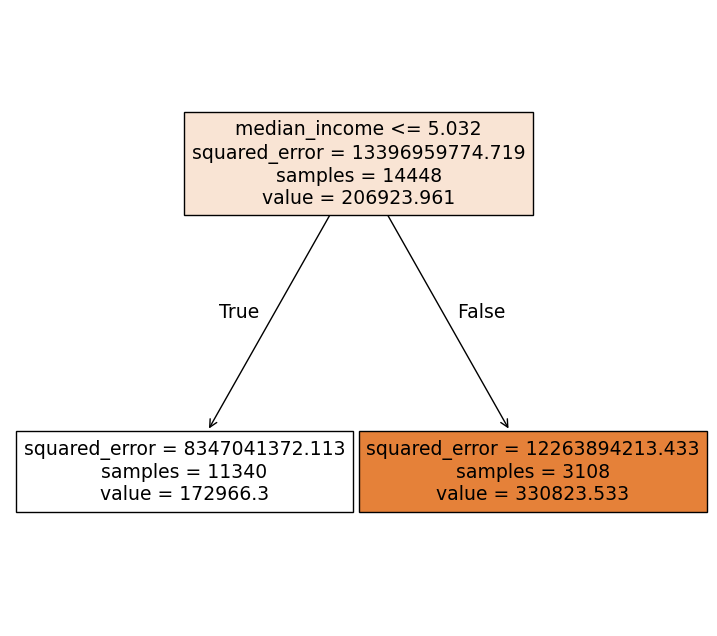

In [37]:
# Visualizando a arvore

plt.figure(figsize=(9,8))
plot_tree(arvore, feature_names = x_treino.columns, filled = True)

- MEDIAN_INCOME é a variável que nossa árvore utilizou inicialmente.
  
- Samples é amostra, portanto pegou os 14448, todos os dados de treino (x_treino.shape) e só fez uma coluna, só utilizou uma variável para criar essa árvore de decisão.

- O valor do MEDIAN_INCOME, o que for menor do que 5.032, ele joga para esquerda e o que for maior ele joga para direita.

In [40]:
# Criando uma arvore com 2 nós de profundidade
arvore = DecisionTreeRegressor(max_depth = 2)

# Treinando o modelo
arvore.fit(x_treino, y_treino)

# Gerando as previsões
previsao = arvore.predict(x_teste)

# Visualizando o MSE
np.sqrt(mean_squared_error(y_teste, previsao))

85788.46356430463

[Text(0.5, 0.8333333333333334, 'median_income <= 5.032\nsquared_error = 13396959774.719\nsamples = 14448\nvalue = 206923.961'),
 Text(0.25, 0.5, 'median_income <= 3.074\nsquared_error = 8347041372.113\nsamples = 11340\nvalue = 172966.3'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 5648845764.928\nsamples = 5490\nvalue = 135562.281'),
 Text(0.375, 0.16666666666666666, 'squared_error = 8334062795.122\nsamples = 5850\nvalue = 208068.534'),
 Text(0.75, 0.5, 'median_income <= 6.868\nsquared_error = 12263894213.433\nsamples = 3108\nvalue = 330823.533'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 9035888579.764\nsamples = 2201\nvalue = 291805.786'),
 Text(0.875, 0.16666666666666666, 'squared_error = 7437901254.397\nsamples = 907\nvalue = 425507.173')]

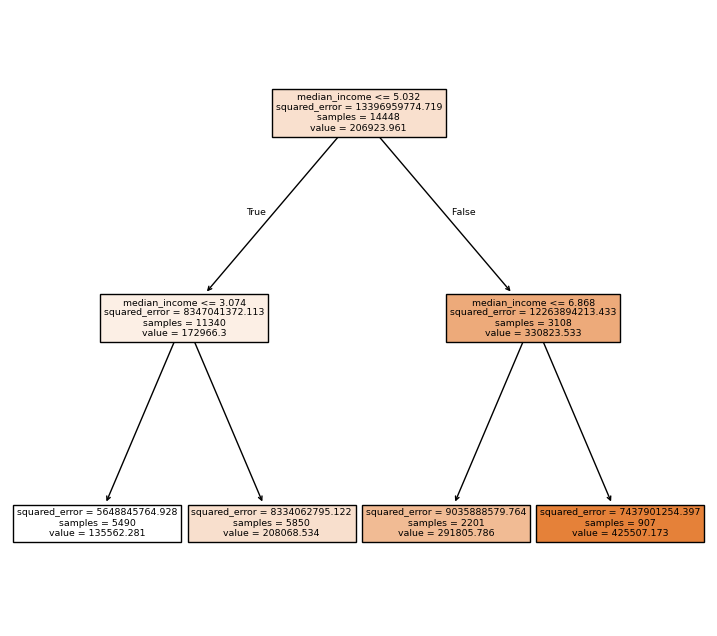

In [42]:
# Visualizando a arvore

plt.figure(figsize=(9,8))
plot_tree(arvore, feature_names = x_treino.columns, filled = True)

In [44]:
# Criando uma arvore com 2 nós de profundidade
arvore = DecisionTreeRegressor(max_depth = 3)

# Treinando o modelo
arvore.fit(x_treino, y_treino)

# Gerando as previsões
previsao = arvore.predict(x_teste)

# Visualizando o MSE
np.sqrt(mean_squared_error(y_teste, previsao))

81989.87432066149

[Text(0.5, 0.875, 'median_income <= 5.032\nsquared_error = 13396959774.719\nsamples = 14448\nvalue = 206923.961'),
 Text(0.25, 0.625, 'median_income <= 3.074\nsquared_error = 8347041372.113\nsamples = 11340\nvalue = 172966.3'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'latitude <= 34.455\nsquared_error = 5648845764.928\nsamples = 5490\nvalue = 135562.281'),
 Text(0.0625, 0.125, 'squared_error = 5604831866.304\nsamples = 2643\nvalue = 157119.076'),
 Text(0.1875, 0.125, 'squared_error = 4857821548.918\nsamples = 2847\nvalue = 115550.125'),
 Text(0.375, 0.375, 'housing_median_age <= 38.5\nsquared_error = 8334062795.122\nsamples = 5850\nvalue = 208068.534'),
 Text(0.3125, 0.125, 'squared_error = 6777914932.832\nsamples = 4642\nvalue = 195598.375'),
 Text(0.4375, 0.125, 'squared_error = 11420078818.133\nsamples = 1208\nvalue = 255987.801'),
 Text(0.75, 0.625, 'median_income <= 6.868\nsquared_error = 12263894213.433\nsamples = 3108\nvalue = 330823.533'),
 Text(0.625, 0.75, '  False'

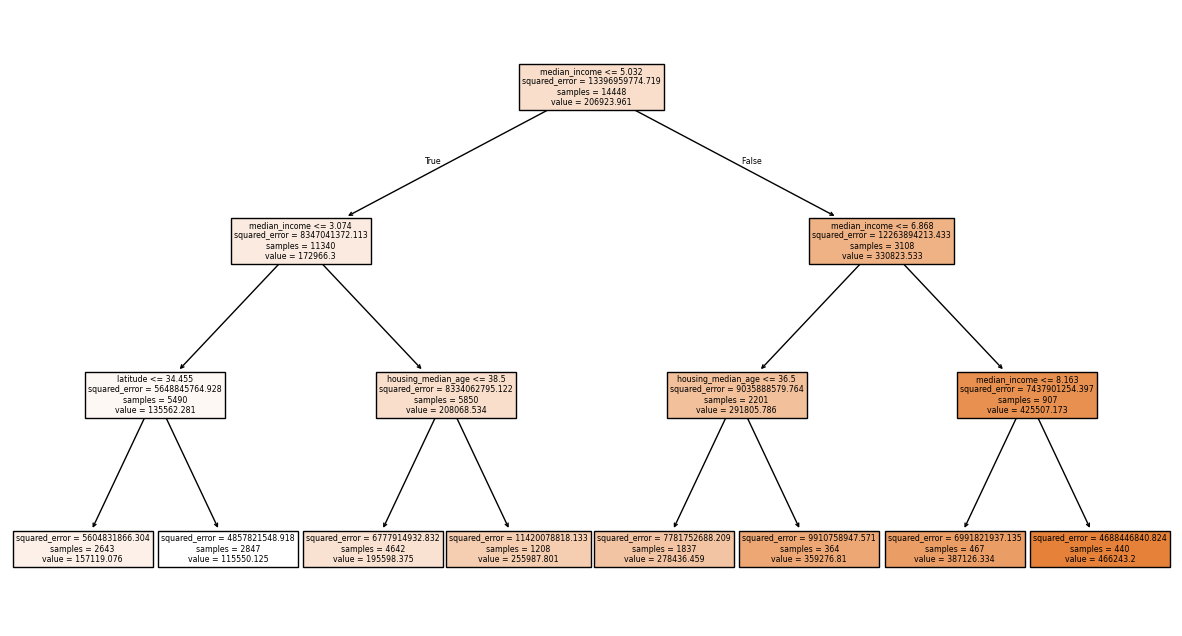

In [48]:
# Visualizando a arvore
plt.figure(figsize=(15,8))
plot_tree(arvore, feature_names = x_treino.columns, filled = True)

# Agora vamos entender o Random Forest...

In [50]:
# Criando o algoritmo
arvores = RandomForestRegressor(random_state = 42)

# Treinando o algoritmo
inicio = time.time()
arvores.fit(x_treino, y_treino)
fim = time.time()

# Gerando as previsões
previsao = arvores.predict(x_teste)

# Visualizando o MSE
print('Valor do MSE: ', np.sqrt(mean_squared_error(y_teste, previsao)))
print('Tempo de treino do modelo: ', fim - inicio)

Valor do MSE:  49745.233888767725
Tempo de treino do modelo:  7.781897783279419


In [52]:
# Criando o algoritmo utilizando o parametro n_jobs
arvores = RandomForestRegressor(random_state = 42, n_jobs = -1)
# njobs= -1, significa que está dizendo para o algoritmo utilizar todos os núcleos de processamento que tem na máquina.

# Treinando o algoritmo
inicio = time.time()
arvores.fit(x_treino, y_treino)
fim = time.time()

# Gerando as previsões
previsao = arvores.predict(x_teste)

# Visualizando o MSE
print('Valor do MSE: ', np.sqrt(mean_squared_error(y_teste, previsao)))
print('Tempo de treino do modelo: ', fim - inicio)

Valor do MSE:  49745.233888767725
Tempo de treino do modelo:  1.272125005722046


In [54]:
# Criar um modelo com 2 nós em cada arvore e utilizando 300 arvores

# Criando o modelo
arvores = RandomForestRegressor(n_estimators = 300, max_depth = 2, random_state = 42, n_jobs = -1)

# Treinando o modelo
arvores.fit(x_treino, y_treino)

# Gerando as previsões
previsao = arvores.predict(x_teste)

# Visualizando o MSE
np.sqrt(mean_squared_error(y_teste, previsao))

84742.95459408363

In [56]:
# Criar um modelo com 5 nós em cada arvore e utilizando 300 arvores

# Criando o modelo
arvores = RandomForestRegressor(n_estimators = 300, max_depth = 5, random_state = 42, n_jobs = -1)

# Treinando o modelo
arvores.fit(x_treino, y_treino)

# Gerando as previsões
previsao = arvores.predict(x_teste)

# Visualizando o MSE
np.sqrt(mean_squared_error(y_teste, previsao))

71376.29102713133

In [58]:
# Criar um modelo com 15 nós em cada arvore e utilizando 300 arvores

# Criando o modelo
arvores = RandomForestRegressor(n_estimators = 300, max_depth = 15, random_state = 42, n_jobs = -1)

# Treinando o modelo
arvores.fit(x_treino, y_treino)

# Gerando as previsões
previsao = arvores.predict(x_teste)

# Visualizando o MSE
np.sqrt(mean_squared_error(y_teste, previsao))

50029.07799525219

# Vamos visualizar e entender o funcionamento do Random Forest

In [60]:
# Criar um modelo com 2 nós em cada arvore e utilizando 5 arvores

# Criando o modelo
arvores = RandomForestRegressor(n_estimators = 5, max_depth = 2, random_state = 42, n_jobs = -1)

# Treinando o modelo
arvores.fit(x_treino, y_treino)

# Gerando as previsões
previsao = arvores.predict(x_teste)

# Visualizando o MSE
np.sqrt(mean_squared_error(y_teste, previsao))

84978.86678466659

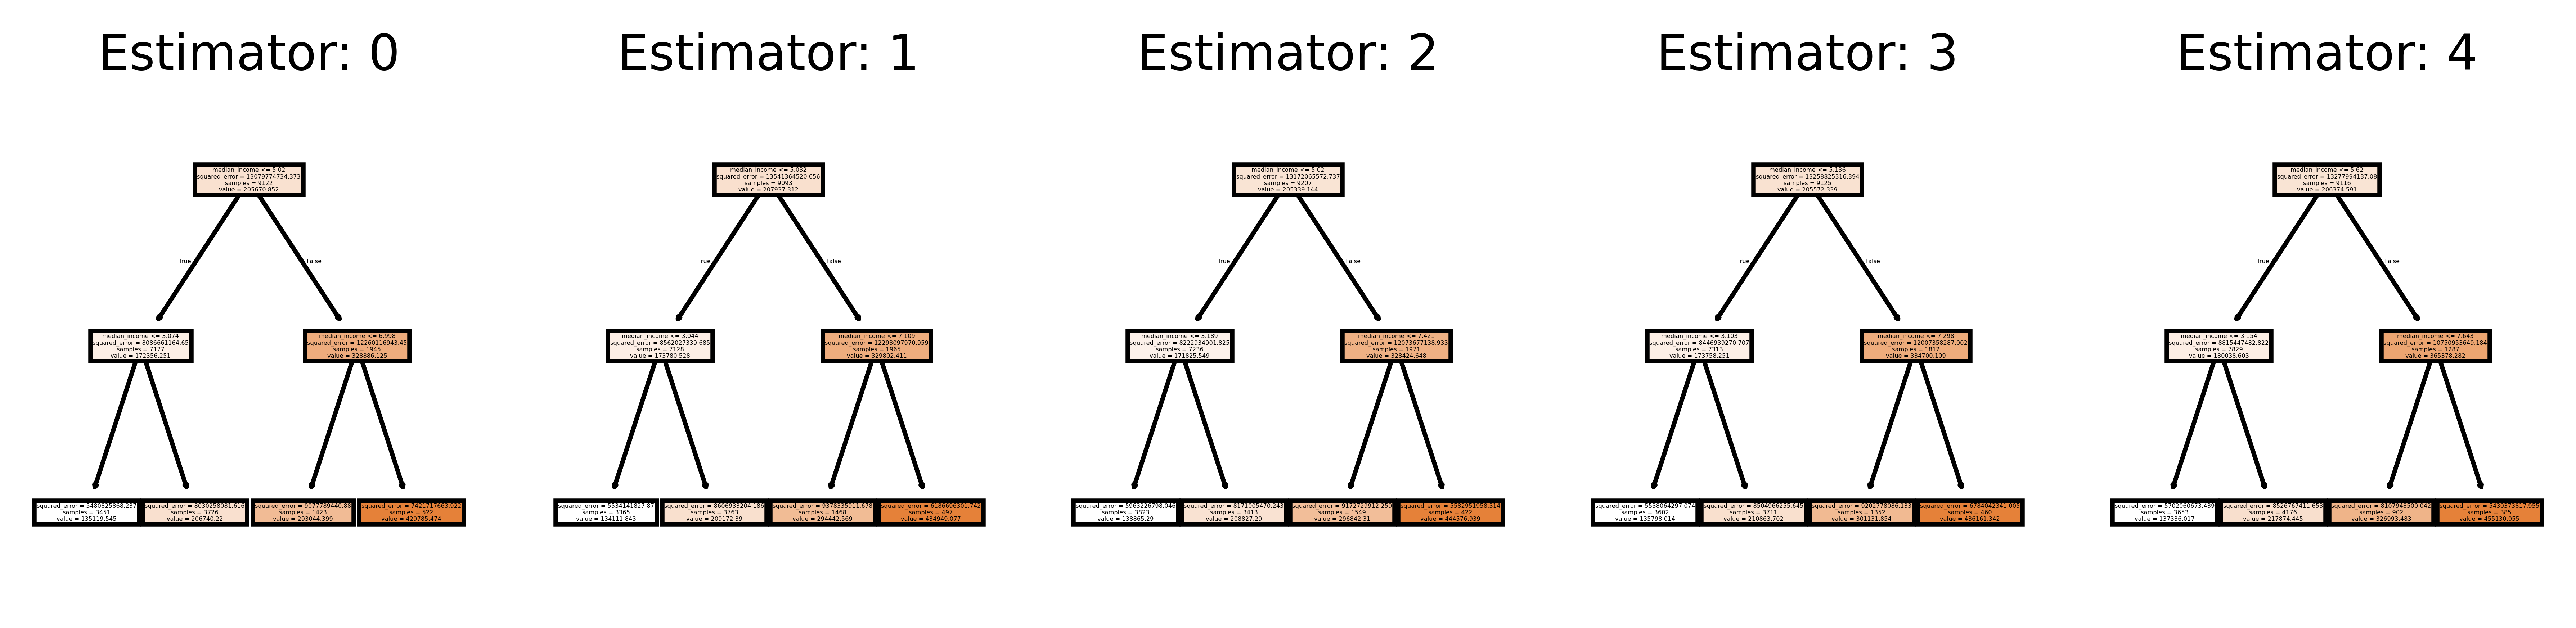

In [62]:
#fn=data.feature_names
#cn=data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    plot_tree(arvores.estimators_[index], feature_names = x_treino.columns, filled = True, ax = axes[index])
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

plt.show()

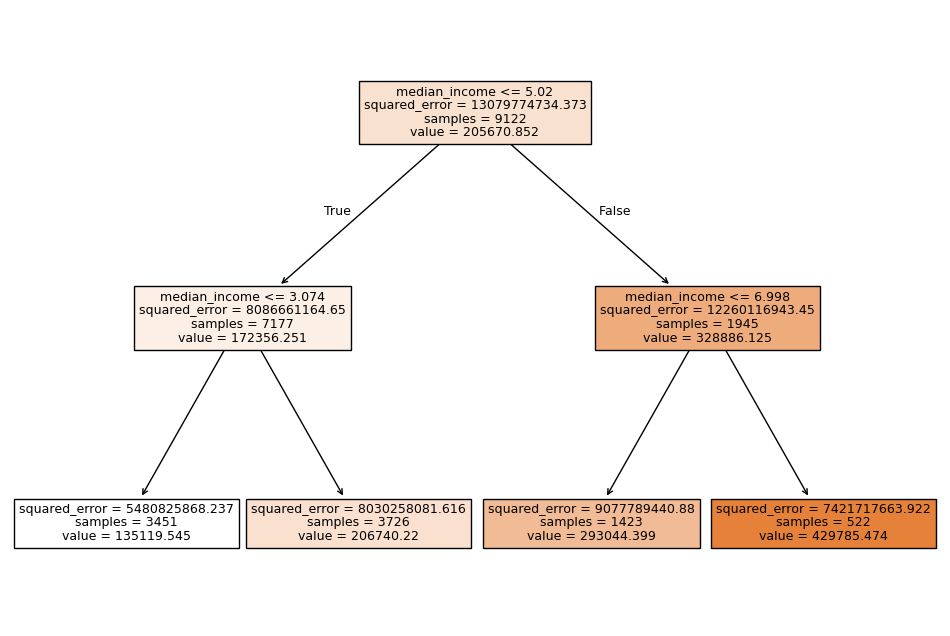

In [64]:
plt.figure(figsize=(12,8))
plot_tree(arvores.estimators_[0], feature_names = x_treino.columns, filled = True)
plt.show()

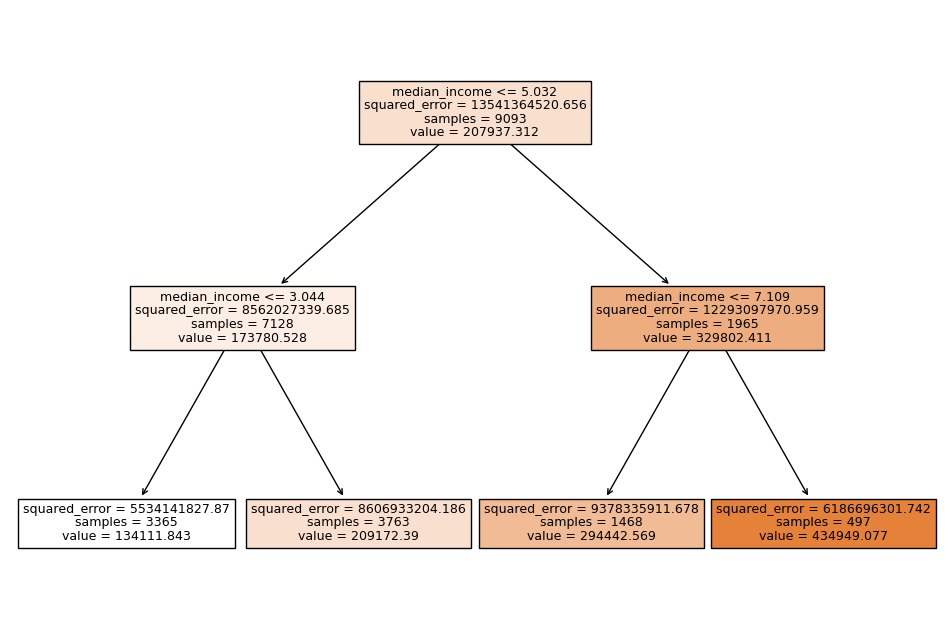

In [24]:
plt.figure(figsize=(12,8))
plot_tree(arvores.estimators_[1], feature_names = x_treino.columns, filled = True)
plt.show()

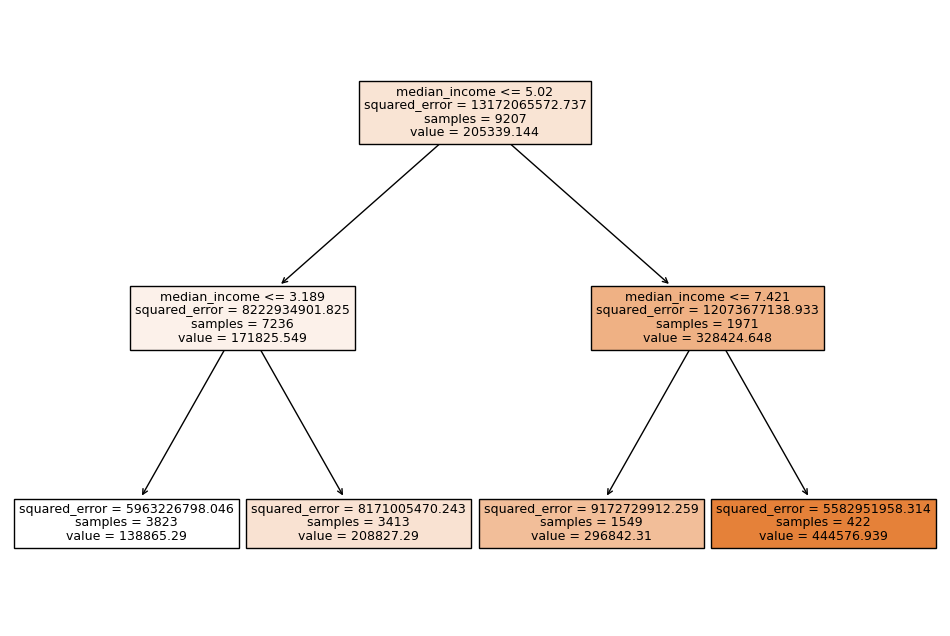

In [25]:
plt.figure(figsize=(12,8))
plot_tree(arvores.estimators_[2], feature_names = x_treino.columns, filled = True)
plt.show()

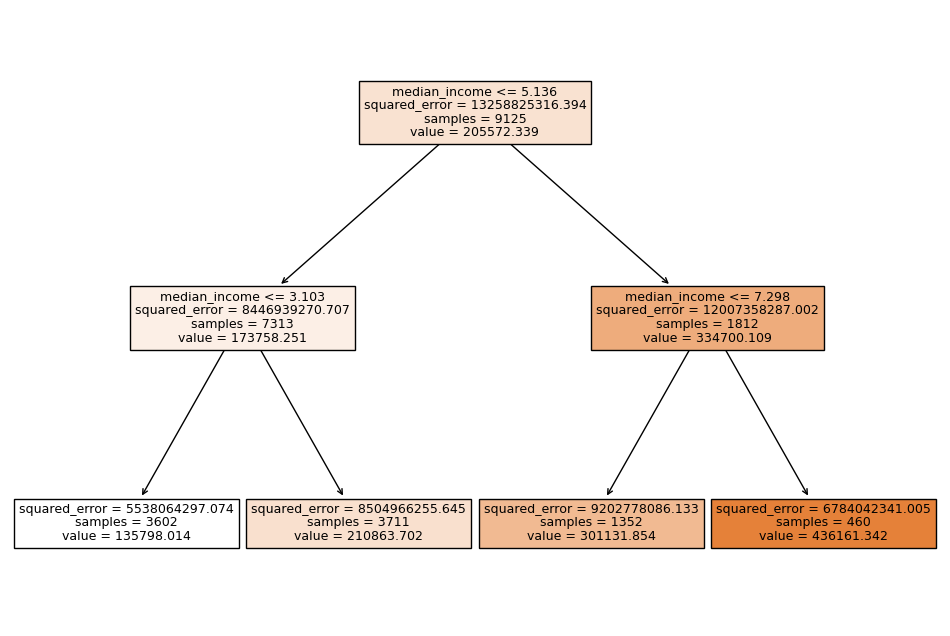

In [26]:
plt.figure(figsize=(12,8))
plot_tree(arvores.estimators_[3], feature_names = x_treino.columns, filled = True)
plt.show()

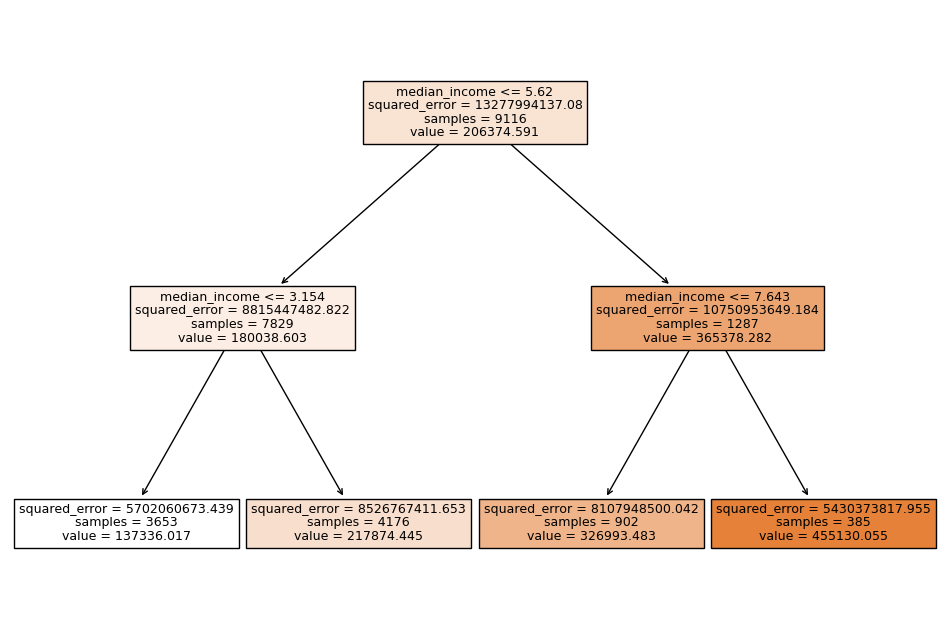

In [27]:
plt.figure(figsize=(12,8))
plot_tree(arvores.estimators_[4], feature_names = x_treino.columns, filled = True)
plt.show()

In [66]:
# Criar um modelo com 3 nós em cada arvore e utilizando 5 arvores

# Criando o modelo
arvores = RandomForestRegressor(n_estimators = 5, max_depth = 3, random_state = 42, n_jobs = -1)

# Treinando o modelo
arvores.fit(x_treino, y_treino)

# Gerando as previsões
previsao = arvores.predict(x_teste)

# Visualizando o MSE
np.sqrt(mean_squared_error(y_teste, previsao))

80636.56492535719

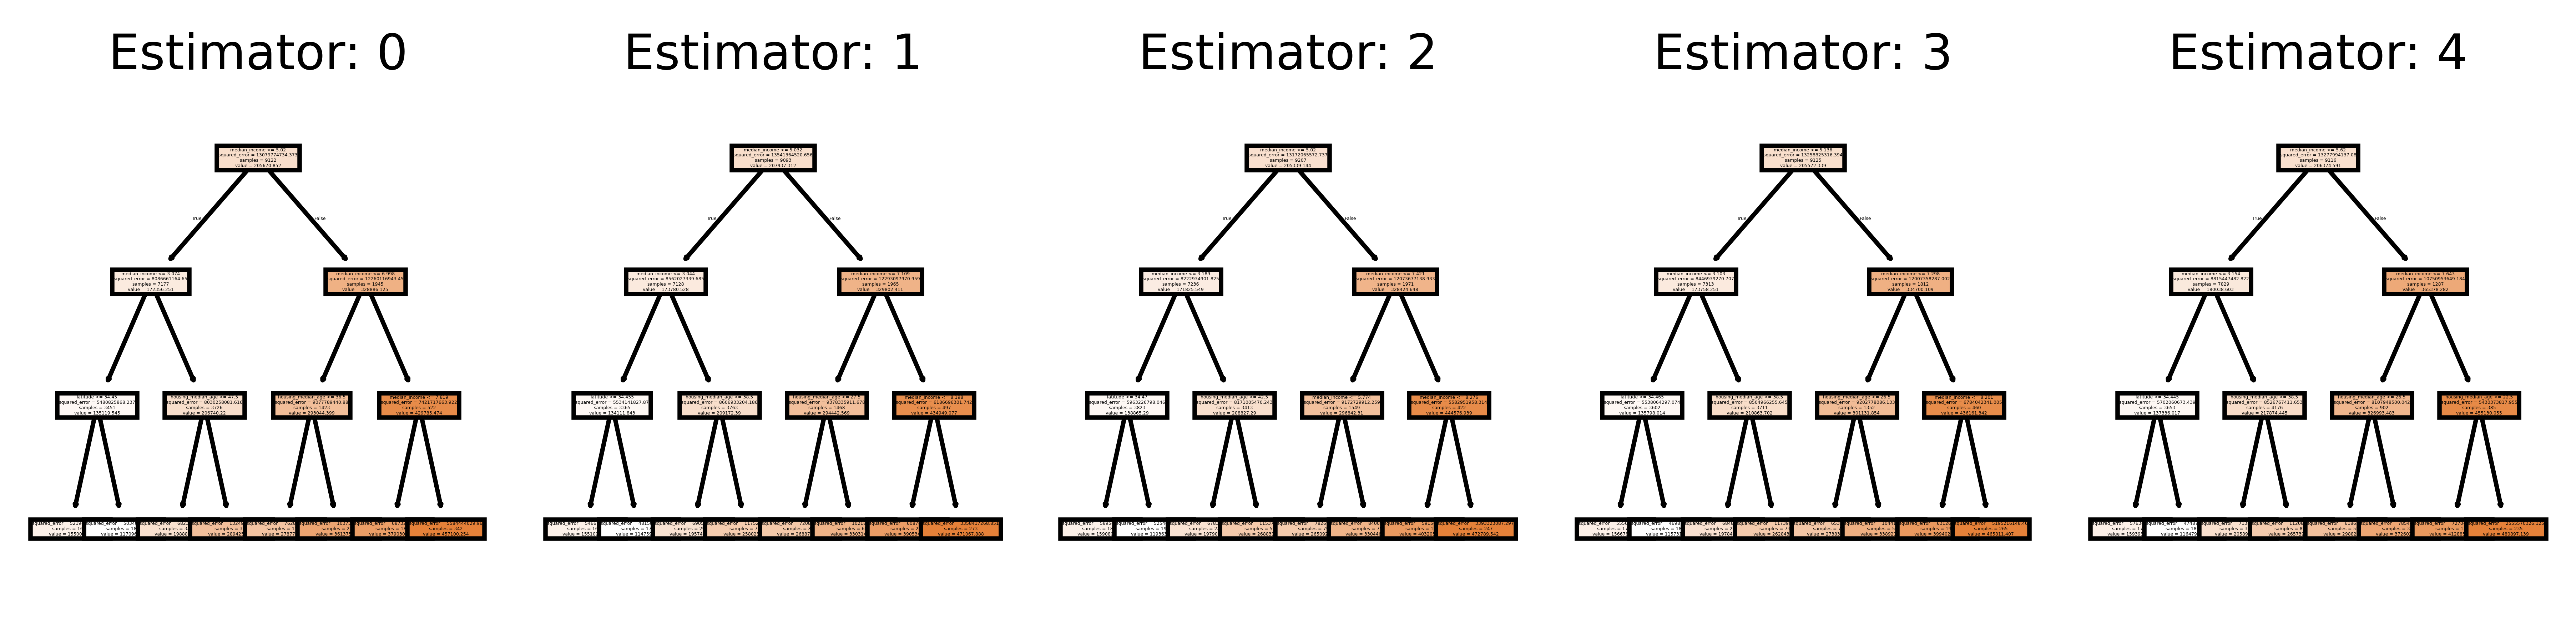

In [68]:
#fn=data.feature_names
#cn=data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    plot_tree(arvores.estimators_[index], feature_names = x_treino.columns, filled = True, ax = axes[index])
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

plt.show()

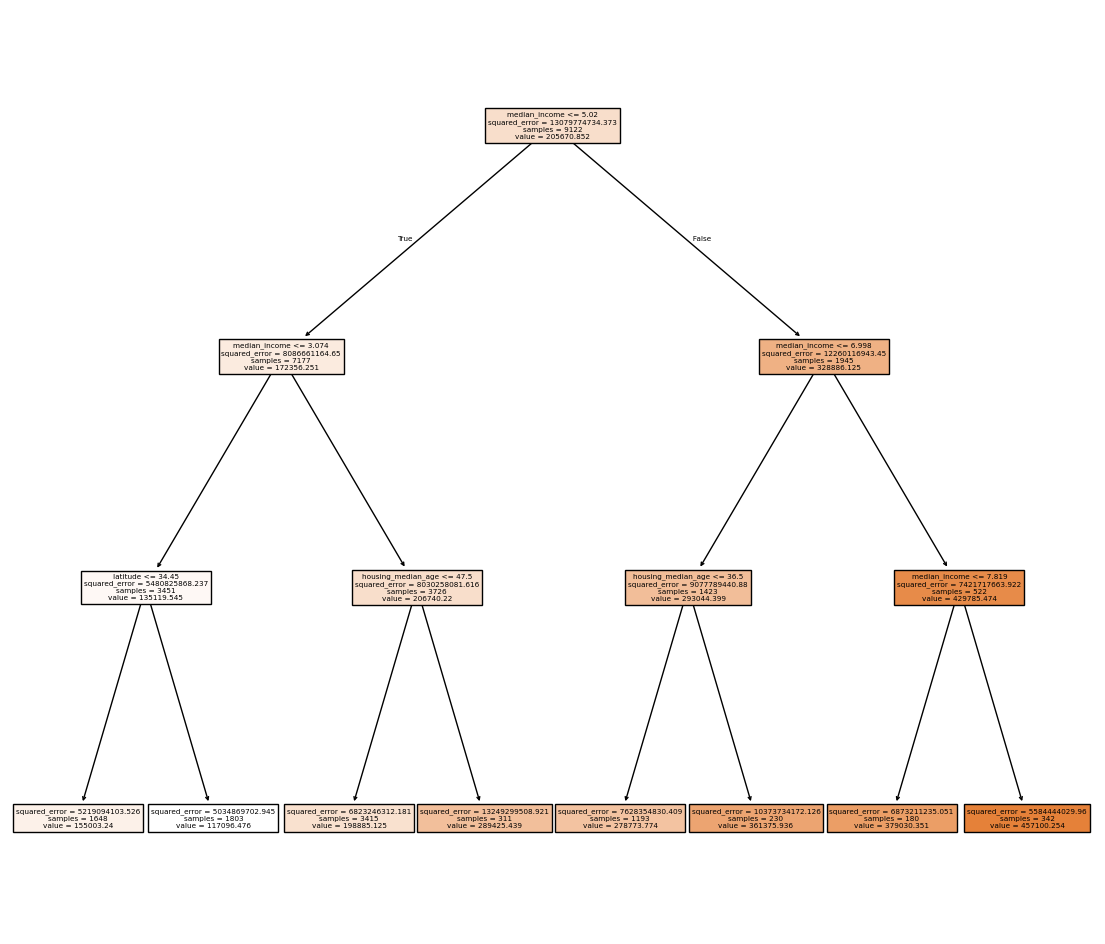

In [69]:
plt.figure(figsize=(14,12))
plot_tree(arvores.estimators_[0], feature_names = x_treino.columns, filled = True)
plt.show()

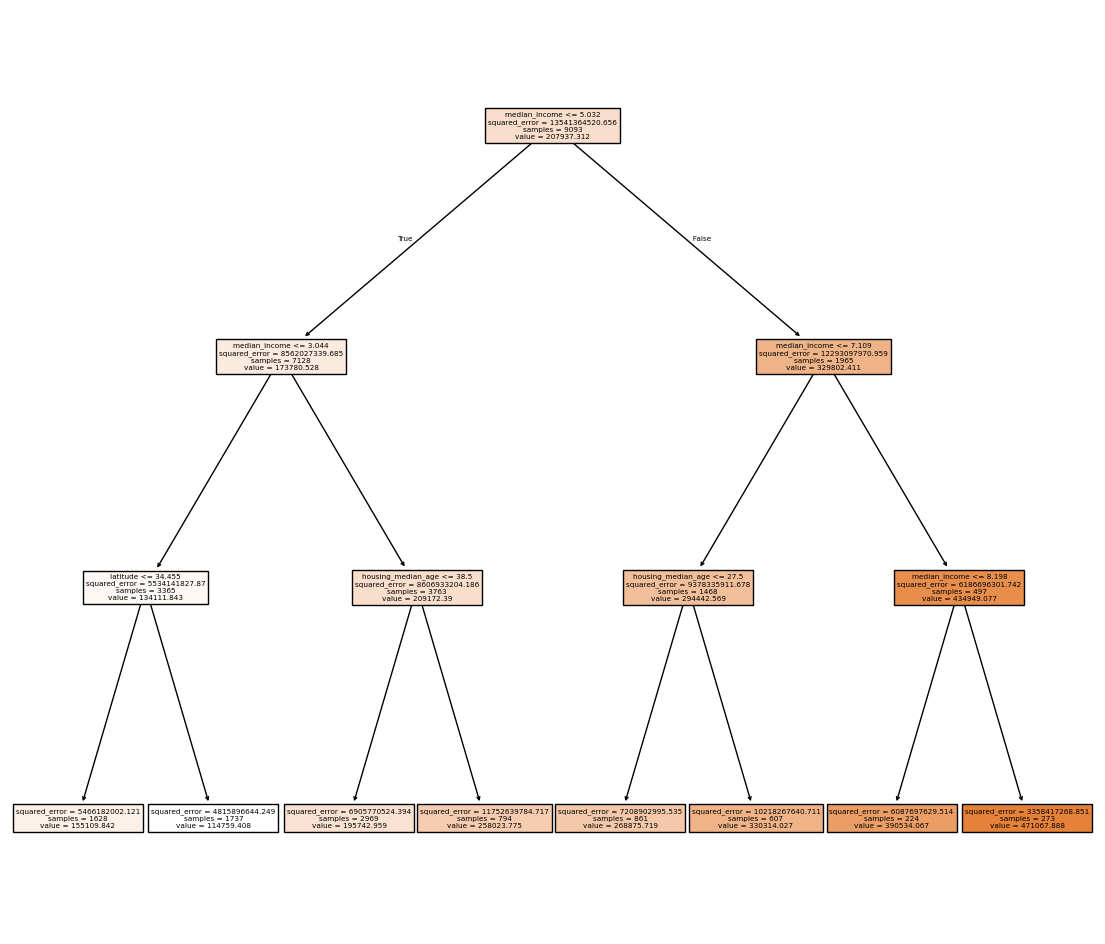

In [70]:
plt.figure(figsize=(14,12))
plot_tree(arvores.estimators_[1], feature_names = x_treino.columns, filled = True)
plt.show()

# O que o algoritmo faz...
<p>O Random forest ira aplicar a aleatoriedade nas variaveis e nas observações do dataset
<p>Ele irá fazer uma amostra com reposição (bootstrap sampling / baggin)  
<p>E pra cada arvore ele irá utilizar um conjunto de dados...
<p>No final ele irá fazer uma média com o resultado de todas as arvores pra gerar o resultado final